# Survival Analysis

## Table of Contents: 
### Preface
### A. Applying KaplanMeierFitter Survival Analysis
### B. Applying CoxPHFitter Survival Analysis

## Preface

## 1. Import necessary libraries:

In [83]:
import os # for the directory 
import csv # reading files
import pandas as pd  # data analysis tools
import numpy as np
from lifelines import CoxPHFitter
from pandas import DataFrame # easier to analysis
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines import *
from lifelines.plotting import qq_plot
fname=r"C:\Users\mohab\gdc_download_PhiSci" # locate the location 
os.chdir(r"C:\Users\mohab\gdc_download_PhiSci") # assign the default work folder 
list_names = os.listdir(fname) # to include all files into one list variable

### A. Applying KaplanMeierFitter Survival Analysis

In [94]:
sub_finalTable_hotted_survival = pd.read_csv('sub_finalTable_hotted_survival_dataset.csv')
sub_finalTable_hotted_survival.head()

,Patients,0,1,Event_Observed,Time_to_event
0,TCGA-05-4244,1,0,False,0.000000
1,TCGA-05-4249,1,0,False,31.729167
2,TCGA-05-4250,1,0,True,2.520833
3,TCGA-05-4382,1,0,False,12.645833
4,TCGA-05-4384,1,0,False,8.875000


In [95]:
#sub_finalTable_hotted_survival[sub_finalTable_hotted_survival['Time_to_event'] > 5] = 5
sub_finalTable_hotted_survival['Time_to_event'].values[sub_finalTable_hotted_survival['Time_to_event'].values > 5] = 5
sub_finalTable_hotted_survival['Event_Observed'].values[sub_finalTable_hotted_survival['Time_to_event'].values >= 5] = False

In [96]:
sub_finalTable_hotted_survival.head()

,Patients,0,1,Event_Observed,Time_to_event
0,TCGA-05-4244,1,0,False,0.000000
1,TCGA-05-4249,1,0,False,5.000000
2,TCGA-05-4250,1,0,True,2.520833
3,TCGA-05-4382,1,0,False,5.000000
4,TCGA-05-4384,1,0,False,5.000000


In [99]:
#sub_finalTable_hotted_survival[(sub_finalTable_hotted_survival["0"] == 1).all(1)]
class_0 = sub_finalTable_hotted_survival.where(sub_finalTable_hotted_survival['0'] == 1).dropna()
class_1 = sub_finalTable_hotted_survival.where(sub_finalTable_hotted_survival['1'] == 1).dropna()
#class_2 = sub_finalTable_hotted_survival.where(sub_finalTable_hotted_survival['2'] == 1).dropna()
#class_3 = sub_finalTable_hotted_survival.where(sub_finalTable_hotted_survival['3'] == 1).dropna()

print(len(class_0), len(class_1))

298 205


In [100]:
class_1.head()

,Patients,0,1,Event_Observed,Time_to_event
5,TCGA-05-4389,0.0,1.0,0.0,5.0
6,TCGA-05-4390,0.0,1.0,0.0,5.0
7,TCGA-05-4395,0.0,1.0,1.0,0.0
8,TCGA-05-4396,0.0,1.0,0.0,5.0
9,TCGA-05-4397,0.0,1.0,0.0,5.0


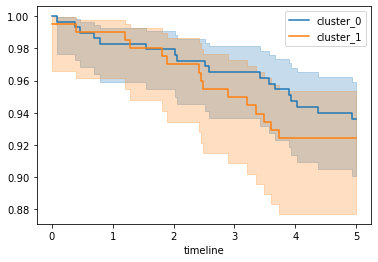

In [105]:
kmf = KaplanMeierFitter()
#cluster 0
T = class_0['Time_to_event']
E = class_0['Event_Observed']
kmf.fit(T, E, label="cluster_0") 
a1 = kmf.plot()
# cluster 1
T = class_1['Time_to_event']
E = class_1['Event_Observed']
kmf.fit(T, E, label="cluster_1") 
a1=kmf.plot(ax=a1)
#cluster 2
#T = class_2['Time_to_event']
#E = class_2['Event_Observed']
#kmf.fit(T, E, label="cluster_2") 
#kmf.plot(ax=a1)
#cluster 3
#T = class_3['Time_to_event']
#E = class_3['Event_Observed']
#kmf.fit(T, E, label="cluster_2") 
#kmf.plot(ax=a1)

In [106]:

#kmf.cumulative_density_

In [107]:
class_1[["Time_to_event", "Event_Observed"]].head()

,Time_to_event,Event_Observed
5,5.0,0.0
6,5.0,0.0
7,0.0,1.0
8,5.0,0.0
9,5.0,0.0


### B. Applying CoxPHFitter Survival Analysis

<AxesSubplot:>

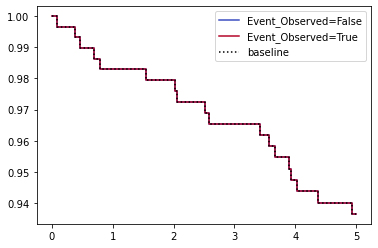

In [111]:
cph = CoxPHFitter()
cph.fit(class_0.iloc[:,[3,4]], duration_col='Time_to_event', event_col='Event_Observed')
cph.plot_partial_effects_on_outcome(covariates='Event_Observed', values=[False, True], cmap='coolwarm')
#cph.plot(hazard_ratios=True)                       
#cph.fit(class_2.iloc[:,[4,5]], duration_col='Time_to_event', event_col='Event_Observed')
#cph.plot_partial_effects_on_outcome(covariates='Event_Observed', values=[False, True], cmap='coolwarm')

In [112]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 298 total observations, 280 right-censored observations>
             duration col = 'Time_to_event'
                event col = 'Event_Observed'
      baseline estimation = breslow
   number of observations = 298
number of events observed = 18
   partial log-likelihood = -101.07
         time fit was run = 2021-01-29 19:59:14 UTC

---
Empty DataFrame
Columns: [ coef,  exp(coef),  se(coef),  coef lower 95%,  coef upper 95%,  exp(coef) lower 95%,  exp(coef) upper 95%]
Index: []

Empty DataFrame
Columns: [ z,  p,  -log2(p)]
Index: []
---
Concordance = 0.50
Partial AIC = 202.14
log-likelihood ratio test = 0.00 on 0 df
-log2(p) of ll-ratio test = nan

<AxesSubplot:>

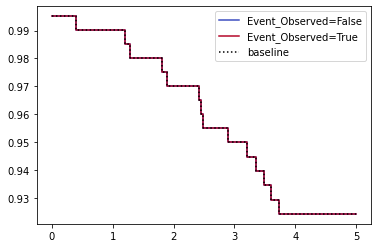

In [113]:
cph.fit(class_1.iloc[:,[3,4]], duration_col='Time_to_event', event_col='Event_Observed')
cph.plot_partial_effects_on_outcome(covariates='Event_Observed', values=[False, True], cmap='coolwarm')

In [114]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 205 total observations, 190 right-censored observations>
             duration col = 'Time_to_event'
                event col = 'Event_Observed'
      baseline estimation = breslow
   number of observations = 205
number of events observed = 15
   partial log-likelihood = -78.76
         time fit was run = 2021-01-29 19:59:23 UTC

---
Empty DataFrame
Columns: [ coef,  exp(coef),  se(coef),  coef lower 95%,  coef upper 95%,  exp(coef) lower 95%,  exp(coef) upper 95%]
Index: []

Empty DataFrame
Columns: [ z,  p,  -log2(p)]
Index: []
---
Concordance = 0.50
Partial AIC = 157.52
log-likelihood ratio test = 0.00 on 0 df
-log2(p) of ll-ratio test = nan